In [1]:
%matplotlib notebook
# the jupyter specific part

import ipywidgets as widget

# enlargen jupyter notebook window
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 100%; }
    div#menubar-container     { width: 95%; }
    div#maintoolbar-container { width: 95%; }
</style>
"""))

In [2]:
# the functional part
import numpy as np
#import scipy.constants as const
#import typhon as tp
import matplotlib.pyplot as plt
import xarray as xr
from time import time as zeit
#import math
from cartopy import crs as ccrs

from cdo import Cdo
cdo = Cdo()

if __name__ == "__main__":
    print("module: nextGEMS")
    
#cdo -sinfov -timselmean,12 -select,level=0 EUREC4A_DOM02_surface_20200208T140000Z_latlon.nc 




module: nextGEMS


In [6]:
# global means created by thorsten
dirname  = '/scratch/m/m300057/'
filename = 'dpp0052_atm_2d_ml_daymean_fldmean_20200120-20200922.nc'

! ls -alh {dirname}{filename}

-rw-r--r-- 1 m300057 mpiaes 831K Oct 20 04:55 /scratch/m/m300057/dpp0052_atm_2d_ml_daymean_fldmean_20200120-20200922.nc


In [8]:
height   = '-select,level=0 '
timemean = '-timselmean,12 '
variable = 'tqc_dia'
def namesel(var):
    return f'-select,name={var} '


selps = '-select,name=ps'
#!cdo -sinfov  {dirname}/{filename}

dat1 = cdo.timselmean(4, 
           input= dirname + filename,
           options = '-r',
           returnXDataset = True)


In [9]:
dat1

<xarray.Dataset>
Dimensions:    (bnds: 2, height: 1, height_2: 1, lat: 1, lon: 1, time: 62)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-21T23:45:00 ... 2020-09-21T11:45:00
  * lon        (lon) float64 0.0
  * lat        (lat) float64 0.0
  * height     (height) float64 10.0
  * height_2   (height_2) float64 2.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    ps         (time, lat, lon) float32 ...
    psl        (time, lat, lon) float32 ...
    rsdt       (time, lat, lon) float32 ...
    rsut       (time, lat, lon) float32 ...
    rsutcs     (time, lat, lon) float32 ...
    rlut       (time, lat, lon) float32 ...
    rlutcs     (time, lat, lon) float32 ...
    rsds       (time, lat, lon) float32 ...
    rsdscs     (time, lat, lon) float32 ...
    rlds       (time, lat, lon) float32 ...
    rldscs     (time, lat, lon) float32 ...
    rsus       (time, lat, lon) float32 ...
    rsuscs     (time, lat, lon) float32 ...
    rlus       (time, lat, lon) float32 ...
    ts         (time, lat, lon) float32 ...
    sic        (time, lat, lon) float32 ...
    sit        (time, lat, lon) float32 ...
    clt        (time, lat, lon) float32 ...
    prlr       (time, lat, lon) float32 ...
    prls       (time, lat, lon) float32 ...
    pr         (time, lat, lon) float32 ...
    prw        (time, lat, lon) float32 ...
    cllvi      (time, lat, lon) float32 ...
    clivi      (time, lat, lon) float32 ...
    qgvi       (time, lat, lon) float32 ...
    qrvi       (time, lat, lon) float32 ...
    qsvi       (time, lat, lon) float32 ...
    cptgzvi    (time, lat, lon) float32 ...
    hfls       (time, lat, lon) float32 ...
    hfss       (time, lat, lon) float32 ...
    evspsbl    (time, lat, lon) float32 ...
    tauu       (time, lat, lon) float32 ...
    tauv       (time, lat, lon) float32 ...
    sfcwind    (time, height, lat, lon) float32 ...
    uas        (time, height, lat, lon) float32 ...
    vas        (time, height, lat, lon) float32 ...
    tas        (time, height_2, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.6
    source:       git@gitlab.dkrz.de:icon/icon-aes.git@ca31bdb300222b1f557dfb...
    institution:  Max Planck Institute for Meteorology
    title:        ICON simulation
    history:      Wed Oct 20 11:46:31 2021: cdo -O -f nc -r -timselmean,4 /sc...
    references:   see MPIM/DWD publications
    comment:      Sapphire Dyamond (k203123) on m20958 (Linux 2.6.32-754.41.2...
    frequency:    day
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...

In [93]:
def plot_var(ax, var):
    dat2=[]
    for d in dat1[var].values:
        d2 = np.squeeze(d)
        dat2.append(d2)
    dat2 = np.asarray(dat2)
    label = dat1[var].long_name
    ax.plot(dat2, label=label)
    
def get_vardict(var):
    vardict = {}
    dat2=[]
    for d in dat1[var].values:
        d2 = np.squeeze(d)
        dat2.append(d2)
    dat2 = np.asarray(dat2)
    
    vardict['values'] = dat2
    vardict['label']  = dat1[var].long_name

    return vardict

def get_dataset(varlist):
    dataset = {}
    for var in varlist:
        dataset[var] = get_vardict(var)
    return dataset


<IPython.core.display.Javascript object>


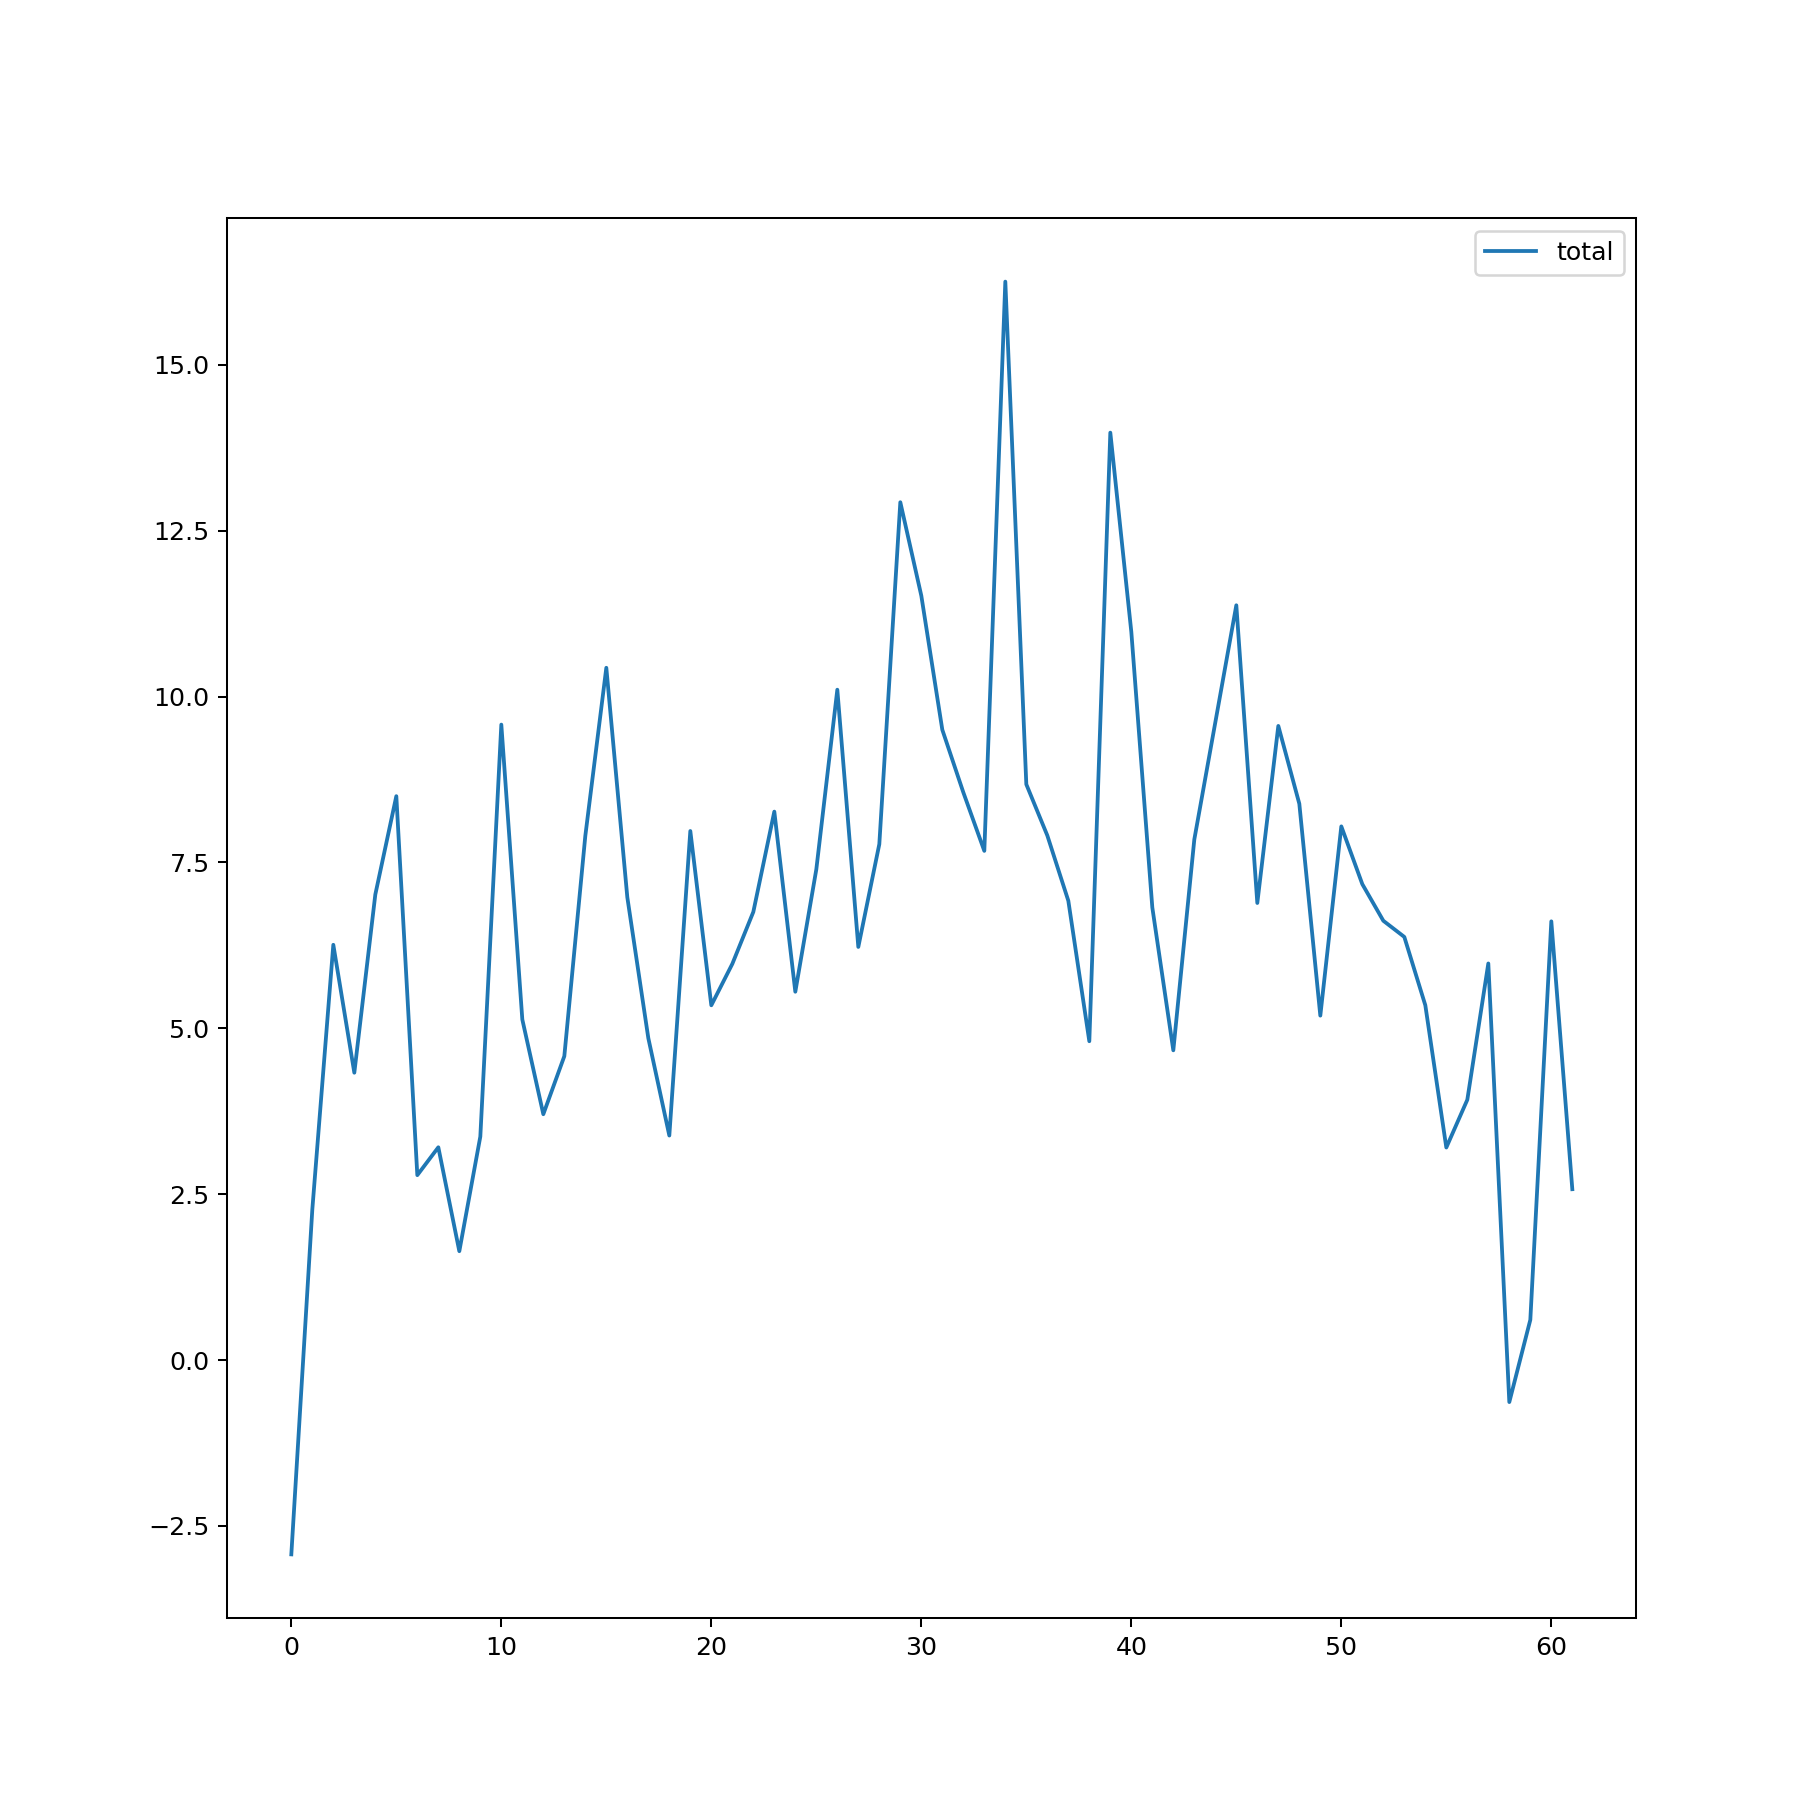

['time_bnds', 'ps', 'psl', 'rsdt', 'rsut', 'rsutcs', 'rlut', 'rlutcs', 'rsds', 'rsdscs', 'rlds', 'rldscs', 'rsus', 'rsuscs', 'rlus', 'ts', 'sic', 'sit', 'clt', 'prlr', 'prls', 'pr', 'prw', 'cllvi', 'clivi', 'qgvi', 'qrvi', 'qsvi', 'cptgzvi', 'hfls', 'hfss', 'evspsbl', 'tauu', 'tauv', 'sfcwind', 'uas', 'vas', 'tas']


In [104]:
fig, ax = plt.subplots(figsize=(10,10))

varlist = ['uas', 'vas']
print(list(dat1.keys()))

# formula:
# - rlut + rlus - rlds + rsdt - rsut - rsds + rsus 
# - hfss + alvpr + (als-alv)prls
#   where alv = 2.5008e6 
#   and   als = 2.8345e6

# crude radiation data
radiationlabels = ['rlut', 'rlus', 'rlds', 'rsdt', 'rsut', 'rsds', 'rsus']
rdata = get_dataset(radiationlabels)
#for var in varlist:
#    ax.plot(radiationdata[var]['values'], label=radiationdata[var]['label'])

net_radiation = (rdata['rlus']['values'] - rdata['rlut']['values'] 
               - rdata['rlds']['values'] + rdata['rsdt']['values']
               - rdata['rsut']['values'] - rdata['rsds']['values']
               + rdata['rsus']['values'] )
#ax.plot(net_radiation, label='net radiation')

fluxlabels = ['hfss', 'pr', 'prls']
alv = 2.5008e6 
als = 2.8345e6
fdata = get_dataset(fluxlabels)
net_flux =   ( - fdata['hfss']['values'] + fdata['pr']['values'] * alv 
               + fdata['prls']['values'] * (als -alv))
#ax.plot(net_flux, label='net flux')

ax.plot(net_flux + net_radiation, label='total')


ax.legend()

